In [44]:
import pickle
from collections import defaultdict
%run utils_rf

In [45]:
with open('mae_results_ws_cat2.pkl','rb') as f:
    mae_results = pickle.load(f)

In [46]:
def get_summaries(results):
    scores = defaultdict(list)
    for i in range(15):
        for run in results[i]:
            score = results[i][run]['avg_score']
            features = results[i][run]['feature_names']
            scores[features].append(score)
    score_summaries = defaultdict(dict)
    for features in scores:
        score_summaries[features]['mean'] = np.mean(scores[features])
        score_summaries[features]['std'] = np.std(scores[features])
        score_summaries[features]['count'] = len(scores[features])
    return score_summaries

In [47]:
def find_best(results, n):
    score_summaries = get_summaries(results)
    best_dict = defaultdict(dict)
    for i in range(n):
        score_summaries_filtered = defaultdict(dict)
        for features in score_summaries:
            if score_summaries[features]['count']>i:
                score_summaries_filtered[features]=score_summaries[features]
        best = -1
        best_features = []
        for features in score_summaries_filtered:
            if score_summaries_filtered[features]['mean']>best:
                best = score_summaries_filtered[features]['mean']
                best_features = features
        best_dict[i + 1]['score'] = best
        best_dict[i + 1]['features'] = best_features
    return best_dict

In [48]:
find_best(mae_results,6)

defaultdict(dict,
            {1: {'score': -0.12084578885992639,
              'features': ('value.Critical Thinking',
               'value.Service Orientation',
               'value.Programming',
               'value.Systems Analysis',
               'value.Problem Sensitivity',
               'value.Time Sharing',
               'value.Computers and Electronics',
               'work_num_1',
               'work_num_3',
               'work_num_4',
               'work_num_5')},
             2: {'score': -0.13892170796039816,
              'features': ('value.Technology Design',
               'value.Personnel and Human Resources',
               'value.Production and Processing',
               'value.Engineering and Technology',
               'value.Communications and Media',
               'work_num_1',
               'work_num_5')},
             3: {'score': -0.13892170796039816,
              'features': ('value.Technology Design',
               'value.Personnel and Human 

In [49]:
def find_best_in_run(results):
    best_dict = defaultdict(dict)
    
    for i in range(15):
        best = -1
        best_features = []
        for run in results[i]:
            score = results[i][run]['avg_score']
            features = results[i][run]['feature_names']
            if score>best:
                best=score
                best_features = features
        best_dict[i]['score'] = best
        best_dict[i]['features'] = best_features 
    return best_dict

In [50]:
run_bests = find_best_in_run(mae_results)
best_lens = []
for i in range(5):
    best_lens.append(len(run_bests[i]['features']))

In [51]:
run_bests

defaultdict(dict,
            {0: {'score': -0.12084578885992639,
              'features': ('value.Critical Thinking',
               'value.Service Orientation',
               'value.Programming',
               'value.Systems Analysis',
               'value.Problem Sensitivity',
               'value.Time Sharing',
               'value.Computers and Electronics',
               'work_num_1',
               'work_num_3',
               'work_num_4',
               'work_num_5')},
             1: {'score': -0.12804469223152926,
              'features': ('value.Persuasion',
               'value.Service Orientation',
               'value.Technology Design',
               'value.Equipment Selection',
               'value.Programming',
               'value.Problem Sensitivity',
               'value.Speed of Closure',
               'value.Selective Attention',
               'value.Time Sharing',
               'value.Explosive Strength',
               'value.Near Vision',
    

(array([2., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 1.]),
 array([11.  , 11.75, 12.5 , 13.25, 14.  , 14.75, 15.5 , 16.25, 17.  ,
        17.75, 18.5 , 19.25, 20.  , 20.75, 21.5 , 22.25, 23.  , 23.75,
        24.5 , 25.25, 26.  ]),
 <a list of 20 Patch objects>)

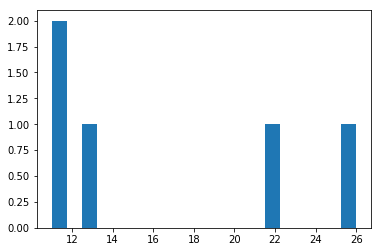

In [52]:
plt.hist(best_lens,bins=20)

In [53]:
performance = []
for i in range(5):
    feature_count_scores = np.zeros(40)
    for run in mae_results[i]:
        feature_count = len(mae_results[i][run]['feature_idx'])
        score = abs(mae_results[i][run]['avg_score'])
        if score > feature_count_scores[feature_count-1]:
            feature_count_scores[feature_count-1]=score
    performance.append(feature_count_scores)

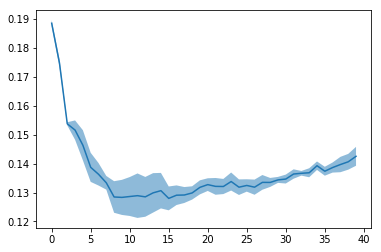

In [54]:
performance = pd.DataFrame(performance)
avg_score = performance.mean(axis=0)
std_score = performance.std(axis=0)
plt.plot(avg_score)
plt.fill_between(range(0,40),avg_score-std_score,avg_score+std_score,alpha=0.5)
plt.show()

In [55]:
#consitency in bests!
all_best_features = np.asarray(run_bests[0]['features'])
for i in range(1,15):
    new = np.asarray(run_bests[i]['features'])
    all_best_features = np.append(all_best_features,new)

In [56]:
unique, counts = np.unique(all_best_features, return_counts=True)
best_feature_counts = dict(zip(unique, counts))
pd.Series(best_feature_counts).sort_values(ascending=False)

value.Computers and Electronics        15
work_num_1                             15
work_num_5                             13
value.Time Sharing                     12
value.Programming                      12
value.Technology Design                11
value.Service Orientation              11
value.Near Vision                      10
work_num_3                             10
value.Customer and Personal Service     9
value.Explosive Strength                8
value.Problem Sensitivity               8
value.Equipment Selection               7
value.Fine Arts                         6
value.Production and Processing         6
value.Law and Government                6
value.Design                            6
value.Selective Attention               5
value.Speed of Closure                  5
value.Personnel and Human Resources     5
value.Dynamic Flexibility               4
value.Persuasion                        4
value.Perceptual Speed                  4
value.Systems Analysis            

In [57]:
chosen = ['value.Critical Thinking',
               'value.Service Orientation',
               'value.Equipment Selection',
               'value.Programming',
               'value.Arm-Hand Steadiness',
               'value.Computers and Electronics',
               'work_num_1',
               'work_num_3',
               'work_num_5']

In [58]:
for feature in chosen:
    print(feature)
    print(best_feature_counts[feature])

value.Critical Thinking
2
value.Service Orientation
11
value.Equipment Selection
7
value.Programming
12
value.Arm-Hand Steadiness
2
value.Computers and Electronics
15
work_num_1
15
work_num_3
10
work_num_5
13
